<a href="https://colab.research.google.com/github/Nsad9579/Clinical-Projects/blob/main/PySpiro_NHANES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Small Airway Dysfunction (SAD) Risk Prediction 

## Data Gathering

### Spirometry data

#### IMPORT PACKAGEs

In [ ]:
import pandas as pd
import numpy as np
import pyarrow as pa
import pyarrow.parquet as pq
from sas7bdat import SAS7BDAT
import matplotlib.pyplot as plt
import platform
print('Python: ', platform.python_version())
print('pandas: ', pd.__version__)
print('pyarrow: ', pa.__version__)

Python:  3.7.6
pandas:  1.3.5
pyarrow:  9.0.0


#### converting data

First I convert raw curve of spirometry from NHANES(2008-2012) into dataframe.

In [ ]:
with SAS7BDAT('Raw Data/SpiroRawCurve_2008.sas7bdat', skip_header=False) as reader:
    SpiroRawCurve_2008 = reader.to_data_frame()
with SAS7BDAT('Raw Data/SpiroRawCurve_2010.sas7bdat', skip_header=False) as reader:
    SpiroRawCurve_2010 = reader.to_data_frame()
with SAS7BDAT('Raw Data/SpiroRawCurve_2012.sas7bdat', skip_header=False) as reader:
    SpiroRawCurve_2012 = reader.to_data_frame()

In [ ]:
SpiroRawCurve_2008.head()

,SEQN,SPATTYPE,SPAMANU,SPAFACT,SPAPOS,SPAPLAT,SPAACC,SPAQEFF,SPXPTS,SPXRAW
0,41475.0,Pre,1.0,1.128,Standing,Y,Y,B,944.0,"0,0,0,-1,-1,-1,0,0,0,0,0,0,1,1,1,1,1,2,1,2,1,2..."
1,41475.0,Pre,2.0,1.128,Standing,Y,Y,A,914.0,"0,0,0,0,0,0,0,0,1,1,2,1,1,1,2,2,1,1,2,1,1,1,1,..."
2,41475.0,Pre,3.0,1.128,Standing,Y,Y,A,966.0,"0,0,0,0,0,0,0,0,1,1,1,1,2,2,1,1,1,1,1,1,1,1,1,..."
3,41476.0,Pre,1.0,1.095,Standing,N,Y,C,270.0,"0,0,0,0,0,0,0,0,0,0,0,-1,-2,-2,-1,0,0,0,0,0,0,..."
4,41476.0,Pre,2.0,1.095,Standing,N,Y,C,397.0,"0,0,0,0,0,0,0,0,-1,-1,-1,0,0,0,0,0,0,0,0,0,1,1..."


In [ ]:
SpiroRawCurve_2010.head()

,SEQN,SPATTYPE,SPAMANU,SPAFACT,SPAPOS,SPAPLAT,SPAACC,SPAQEFF,SPXPTS,SPXRAW
0,51626.0,Pre,1.0,1.09,Standing,Y,N,D,1008.0,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
1,51626.0,Pre,2.0,1.09,Standing,Y,Y,B,818.0,"0,1,-2,-3,-4,-4,-3,-2,-2,-3,-1,-1,3,6,11,13,14..."
2,51626.0,Pre,3.0,1.09,Standing,Y,Y,A,807.0,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-2,-2,-..."
3,51626.0,Pre,4.0,1.09,Standing,Y,Y,A,845.0,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
4,51626.0,Pre,5.0,1.09,Standing,Y,Y,A,931.0,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."


In [ ]:
SpiroRawCurve_2012.head()

,SEQN,SPATTYPE,SPAMANU,SPAFACT,SPAPOS,SPAPLAT,SPAACC,SPAQEFF,SPXPTS,SPXRAW
0,62161.0,Pre,1.0,1.075,Standing,Y,N,D,945.0,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
1,62161.0,Pre,2.0,1.075,Standing,Y,N,D,1186.0,"0,0,-1,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."
2,62161.0,Pre,3.0,1.075,Standing,N,N,D,346.0,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
3,62161.0,Pre,4.0,1.075,Standing,N,N,D,270.0,"0,0,0,1,0,1,2,1,2,2,1,2,2,2,2,1,2,1,2,1,1,1,1,..."
4,62161.0,Pre,5.0,1.075,Standing,Y,Y,A,807.0,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."


#### concatenation and saving

In [ ]:
SpiroRawCurve = pd.concat([SpiroRawCurve_2008,SpiroRawCurve_2010,SpiroRawCurve_2012])
SpiroRawCurve.to_csv('Raw Data/FSpiroRawCurve.csv')

### Other datasets


other datasets were :
- Cardiovascular Health 
- Current Health Status 
- Demographics Data 
- Diabetes 
- Occupation 
- Respiratory Health 
- Sleep Disorders
- Smoking CigaretteUse 
- Smoking Household mokers 
- Smoking Recent TobaccoUse 
- Weight History 
- Body Measure 
- Medical Condition

In [ ]:
CardiovascularHealth2008 = pd.read_sas('Raw Data/CardiovascularHealth2008.XPT')
CardiovascularHealth2010 = pd.read_sas('Raw Data/CardiovascularHealth2010.XPT')
CardiovascularHealth2012 = pd.read_sas('Raw Data/CardiovascularHealth2012.XPT')
CardiovascularHealth = pd.concat([CardiovascularHealth2008,CardiovascularHealth2010,CardiovascularHealth2012])
CardiovascularHealth.to_csv('Raw Data/FCardiovascularHealth.csv')

In [ ]:
CurrentHealthStatus2008 = pd.read_sas('Raw Data/CurrentHealthStatus2008.XPT')
CurrentHealthStatus2010 = pd.read_sas('Raw Data/CurrentHealthStatus2010.XPT')
CurrentHealthStatus2012 = pd.read_sas('Raw Data/CurrentHealthStatus2012.XPT')
CurrentHealthStatus = pd.concat([CurrentHealthStatus2008,CurrentHealthStatus2010,CurrentHealthStatus2012])
CurrentHealthStatus.to_csv('Raw Data/FCurrentHealthStatus.csv')

In [ ]:
DemographicsData2008 = pd.read_sas('Raw Data/DemographicsData2008.XPT')
DemographicsData2010 = pd.read_sas('Raw Data/DemographicsData2010.XPT')
DemographicsData2012 = pd.read_sas('Raw Data/DemographicsData2012.XPT')
DemographicsData = pd.concat([DemographicsData2008,DemographicsData2010,DemographicsData2012])
DemographicsData.to_csv('Raw Data/FDemographicsData.csv')

In [ ]:
Diabetes2008 = pd.read_sas('Raw Data/Diabetes2008.XPT')
Diabetes2010 = pd.read_sas('Raw Data/Diabetes2010.XPT')
Diabetes2012 = pd.read_sas('Raw Data/Diabetes2012.XPT')
Diabetes = pd.concat([Diabetes2008,Diabetes2010,Diabetes2012])
Diabetes.to_csv('Raw Data/FDiabetes.csv')

In [ ]:
Occupation2008 = pd.read_sas('Raw Data/Occupation2008.XPT')
Occupation2010 = pd.read_sas('Raw Data/Occupation2010.XPT')
Occupation2012 = pd.read_sas('Raw Data/Occupation2012.XPT')
Occupation = pd.concat([Occupation2008,Occupation2010,Occupation2012])
Occupation.to_csv('Raw Data/FOccupation.csv')

In [ ]:
RespiratoryHealth2008 = pd.read_sas('Raw Data/RespiratoryHealth2008.XPT')
RespiratoryHealth2010 = pd.read_sas('Raw Data/RespiratoryHealth2010.XPT')
RespiratoryHealth2012 = pd.read_sas('Raw Data/RespiratoryHealth2012.XPT')
RespiratoryHealth = pd.concat([RespiratoryHealth2008,RespiratoryHealth2010,RespiratoryHealth2012])
RespiratoryHealth.to_csv('Raw Data/FRespiratoryHealth.csv')

In [ ]:
SleepDisorders2008 = pd.read_sas('Raw Data/SleepDisorders2008.XPT')
SleepDisorders2010 = pd.read_sas('Raw Data/SleepDisorders2010.XPT')
SleepDisorders2012 = pd.read_sas('Raw Data/SleepDisorders2012.XPT')
SleepDisorders = pd.concat([SleepDisorders2008,SleepDisorders2010,SleepDisorders2012])
SleepDisorders.to_csv('Raw Data/FSleepDisorders.csv')

In [ ]:
SmokingCigaretteUse2008 = pd.read_sas('Raw Data/SMQ_E.XPT')
SmokingCigaretteUse2010 = pd.read_sas('Raw Data/SMQ_F.XPT')
SmokingCigaretteUse2012 = pd.read_sas('Raw Data/SMQ_G.XPT')
SmokingCigaretteUse = pd.concat([SmokingCigaretteUse2008,SmokingCigaretteUse2010,SmokingCigaretteUse2012])
SmokingCigaretteUse.to_csv('Raw Data/FSmokingCigaretteUse.csv')

In [ ]:
SmokingHouseholdSmokers2008 = pd.read_sas('Raw Data/SmokingHouseholdSmokers2008.XPT')
SmokingHouseholdSmokers2010 = pd.read_sas('Raw Data/SmokingHouseholdSmokers2010.XPT')
SmokingHouseholdSmokers2012 = pd.read_sas('Raw Data/SmokingHouseholdSmokers2012.XPT')
SmokingHouseholdSmokers = pd.concat([SmokingHouseholdSmokers2008,SmokingHouseholdSmokers2010,SmokingHouseholdSmokers2012])
SmokingHouseholdSmokers.to_csv('Raw Data/FSmokingHouseholdSmokers.csv')

In [ ]:
SmokingRecentTobaccoUse2008 = pd.read_sas('Raw Data/SmokingRecentTobaccoUse2008.XPT')
SmokingRecentTobaccoUse2010 = pd.read_sas('Raw Data/SmokingRecentTobaccoUse2010.XPT')
SmokingRecentTobaccoUse2012 = pd.read_sas('Raw Data/SmokingRecentTobaccoUse2012.XPT')
SmokingRecentTobaccoUse = pd.concat([SmokingRecentTobaccoUse2008,SmokingRecentTobaccoUse2010,SmokingRecentTobaccoUse2012])
SmokingRecentTobaccoUse.to_csv('Raw Data/FSmokingRecentTobaccoUse.csv')

In [ ]:
WeightHistory2008 = pd.read_sas('Raw Data/WeightHistory2008.XPT')
WeightHistory2010 = pd.read_sas('Raw Data/WeightHistory2010.XPT')
WeightHistory2012 = pd.read_sas('Raw Data/WeightHistory2012.XPT')
WeightHistory = pd.concat([WeightHistory2008, WeightHistory2010, WeightHistory2012])
WeightHistory.to_csv('Raw Data/FWeightHistory.csv')

In [ ]:
BodyMeasure2008 = pd.read_sas('Raw Data/BodyMeasure2008.XPT')
BodyMeasure2010 = pd.read_sas('Raw Data/BodyMeasure2010.XPT')
BodyMeasure2012 = pd.read_sas('Raw Data/BodyMeasure2012.XPT')
BodyMeasure = pd.concat([BodyMeasure2008, BodyMeasure2010, BodyMeasure2012])
BodyMeasure.to_csv('Raw Data/FBodyMeasure.csv')

In [ ]:
MedicalCondition2008 = pd.read_sas('Raw Data/MCQ_E.XPT')
MedicalCondition2010 = pd.read_sas('Raw Data/MCQ_F.XPT')
MedicalCondition2012 = pd.read_sas('Raw Data/MCQ_G.XPT')
MedicalCondition = pd.concat([MedicalCondition2008,MedicalCondition2010,MedicalCondition2012])
MedicalCondition.to_csv('Raw Data/FMedicalCondition.csv')

#### Import datasets again

In [ ]:
CardiovascularHealth = pd.read_csv('Raw Data/FCardiovascularHealth.csv')
CurrentHealthStatus = pd.read_csv('Raw Data/FCurrentHealthStatus.csv')
MedicalCondition = pd.read_csv('Raw Data/FMedicalCondition.csv')
DemographicsData = pd.read_csv('Raw Data/FDemographicsData.csv')
Diabetes = pd.read_csv('Raw Data/FDiabetes.csv')
Occupation = pd.read_csv('Raw Data/FOccupation.csv')
RespiratoryHealth = pd.read_csv('Raw Data/FRespiratoryHealth.csv')
SleepDisorders = pd.read_csv('Raw Data/FSleepDisorders.csv')
SmokingCigaretteUse = pd.read_csv('Raw Data/FSmokingCigaretteUse.csv')
SmokingHouseholdSmokers = pd.read_csv('Raw Data/FSmokingHouseholdSmokers.csv')
SmokingRecentTobaccoUse = pd.read_csv('Raw Data/FSmokingRecentTobaccoUse.csv')
WeightHistory = pd.read_csv('Raw Data/FWeightHistory.csv')
BodyMeasure = pd.read_csv('Raw Data/FBodyMeasure.csv')
SpiroRawCurve = pd.read_csv('Raw Data/FSpiroRawCurve.csv')

In [ ]:
All = [CardiovascularHealth ,CurrentHealthStatus ,DemographicsData ,Diabetes ,Occupation ,RespiratoryHealth ,SleepDisorders , 
      SmokingCigaretteUse ,SmokingHouseholdSmokers ,SmokingRecentTobaccoUse , WeightHistory ,BodyMeasure , MedicalCondition]

In [ ]:
def NAME(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]

In [ ]:
for names in All:
    print(f"the length of {NAME(names , globals())[0]} Dataframe is :       " , names.shape)

the length of CardiovascularHealth Dataframe is :        (11763, 17)
the length of CurrentHealthStatus Dataframe is :        (28098, 14)
the length of DemographicsData Dataframe is :        (30442, 54)
the length of Diabetes Dataframe is :        (29139, 64)
the length of Occupation Dataframe is :        (19610, 25)
the length of RespiratoryHealth Dataframe is :        (29139, 15)
the length of SleepDisorders Dataframe is :        (19610, 28)
the length of SmokingCigaretteUse Dataframe is :        (21463, 38)
the length of SmokingHouseholdSmokers Dataframe is :        (30442, 5)
the length of SmokingRecentTobaccoUse Dataframe is :        (20835, 24)
the length of WeightHistory Dataframe is :        (19610, 63)
the length of BodyMeasure Dataframe is :        (29353, 30)
the length of names Dataframe is :        (29139, 108)


In [ ]:
MedicalCondition = MedicalCondition.set_index('SEQN')
CardiovascularHealth = CardiovascularHealth.set_index('SEQN')
CurrentHealthStatus  = CurrentHealthStatus.set_index('SEQN')
DemographicsData = DemographicsData.set_index('SEQN')
Diabetes = Diabetes.set_index('SEQN')
Occupation = Occupation.set_index('SEQN')
RespiratoryHealth = RespiratoryHealth.set_index('SEQN')
SleepDisorders = SleepDisorders.set_index('SEQN')
SmokingCigaretteUse = SmokingCigaretteUse.set_index('SEQN')
SmokingHouseholdSmokers = SmokingHouseholdSmokers.set_index('SEQN')
SmokingRecentTobaccoUse = SmokingRecentTobaccoUse.set_index('SEQN')
WeightHistory = WeightHistory.set_index('SEQN')
BodyMeasure = BodyMeasure.set_index('SEQN')

In [ ]:
Alls = pd.concat([CardiovascularHealth ,CurrentHealthStatus ,DemographicsData ,
                  Diabetes ,Occupation ,RespiratoryHealth ,SleepDisorders , 
                  SmokingCigaretteUse ,SmokingHouseholdSmokers , 
                  SmokingRecentTobaccoUse , WeightHistory ,BodyMeasure , MedicalCondition ] , axis = 1)

In [ ]:
Alls.head()

,Unnamed: 0,CDQ001,CDQ002,CDQ003,CDQ004,CDQ005,CDQ006,CDQ009A,CDQ009B,CDQ009C,...,MCQ195,MCQ365A,MCQ365B,MCQ365C,MCQ365D,MCQ370A,MCQ370B,MCQ370C,MCQ370D,MCQ380
SEQN,,,,,,,,,,,,,,,,,,,,,
41475.0,0.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41476.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41477.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41478.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41479.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
Alls.to_csv('Raw Data/ALLS.csv')

In [ ]:
cols = [ 'RIDAGEYR' , 'BMXHT', 'RIDRETH1' ,'SMQ680', 'CDQ001' , 'CDQ010' , 'HSD010' , 'HSQ500' , 
               'HSQ520' , 'RIAGENDR' , 'RIDAGEEX' , 'DIQ010' , 'OCD390G' , 'OCQ510' , 'OCQ530' , 
               'OCQ550' , 'OCQ570' , 'RDQ070' , 'RDQ031' , 'RDQ140' , 'RDQ050' , 'SLD010H' , 'SLQ050' , 'SLQ090' , 'SLQ100' , 'SLQ120' , 
               'SMQ020' , 'SMD410' , 'WHD020' , 'BMXWT'  , 'MCQ300B' , 'MCQ010' ]
len(cols)

32

In [ ]:
Features = Alls[cols]

In [ ]:
len(Features)

30442

In [ ]:
Features.to_csv('Raw Data/FFeatures.csv')

### Spirometry (our desired lable)

In [ ]:
SpiroRawCurve = pd.read_csv('Raw Data/FSpiroRawCurve.csv')

In [ ]:
Signals = SpiroRawCurve[(SpiroRawCurve['SPAQEFF']=='A') 
                       & (SpiroRawCurve['SPAPOS']=='Standing')
              & (SpiroRawCurve['SPATTYPE']=='Pre') 
                       & (SpiroRawCurve['SPAACC']=='Y') 
                      & (SpiroRawCurve['SPAPLAT']=='Y')
                      #& (SpiroRawCurve['SPAMANU']=='')
]

In [ ]:
Signal_indexed = Signals.set_index('SEQN')

In [ ]:
SEQNs = Signals.SEQN.unique()
lens = Signal_indexed.SPXPTS.unique()
dataframe = pd.DataFrame()

In [ ]:
Signal_indexed[Signal_indexed.index == 41475]

,Unnamed: 0,SPATTYPE,SPAMANU,SPAFACT,SPAPOS,SPAPLAT,SPAACC,SPAQEFF,SPXPTS,SPXRAW
SEQN,,,,,,,,,,
41475.0,1,Pre,2.0,1.128,Standing,Y,Y,A,914.0,"0,0,0,0,0,0,0,0,1,1,2,1,1,1,2,2,1,1,2,1,1,1,1,..."
41475.0,2,Pre,3.0,1.128,Standing,Y,Y,A,966.0,"0,0,0,0,0,0,0,0,1,1,1,1,2,2,1,1,1,1,1,1,1,1,1,..."


In [ ]:
#Signal_indexed[Signal_indexed.index == 41475]
Signal_indexed[(Signal_indexed.index == 41475) & (Signal_indexed.SPXPTS == 966)]['SPXRAW']

SEQN
41475.0    0,0,0,0,0,0,0,0,1,1,1,1,2,2,1,1,1,1,1,1,1,1,1,...
Name: SPXRAW, dtype: object

In [ ]:
rows = []
Signal_indexed = Signal_indexed[Signal_indexed.SPXPTS > 300]
SEQNs = Signal_indexed.index.unique()

for seqn in SEQNs: 
    #print(seqn)
    A = list(Signal_indexed[Signal_indexed.index == seqn]['SPXPTS'])
    spxraw = Signal_indexed[(Signal_indexed.index == seqn) & (Signal_indexed.SPXPTS == max(A))]['SPXRAW'].tolist()
    spxpts = Signal_indexed[(Signal_indexed.index == seqn) & (Signal_indexed.SPXPTS == max(A))]['SPXPTS'].tolist()
    spxraw = [int(s) for s in spxraw[0].split(',') ]
    rows.append([ seqn , spxraw , spxpts[0]])

In [ ]:
final_signals = pd.DataFrame( rows , columns = [ 'seqn' , 'spxraw' , 'spxpts' ] )

In [ ]:
a = final_signals.spxraw[9]
type(a)

list

In [ ]:
final_signals.to_csv('final_signals.csv') 

#### Gathering different dataset

In [ ]:
Features =  pd.read_csv('Raw Data/FFeatures.csv')
#final_signals = pd.read_csv('final_signals.csv') 
Features = Features.set_index('SEQN')
final_signals = final_signals.set_index('seqn')
SeqFeatures = Features[Features.index.isin(SEQNs)]
print("final signals shape is " , final_signals.shape , "SeqFeatures shape is" , SeqFeatures.shape)

final signals shape is  (18658, 2) SeqFeatures shape is (18658, 32)


In [ ]:
SeqFeatures.head(-10)

,RIDAGEYR,BMXHT,RIDRETH1,SMQ680,CDQ001,CDQ010,HSD010,HSQ500,HSQ520,RIAGENDR,...,SLQ050,SLQ090,SLQ100,SLQ120,SMQ020,SMD410,WHD020,BMXWT,MCQ300B,MCQ010
SEQN,,,,,,,,,,,,,,,,,,,,,
41475.0,62.0,154.7,5.0,2.0,1.0,1.0,3.0,2.0,2.0,2.0,...,1.0,4.000000e+00,4.000000e+00,3.000000e+00,2.0,2.0,308.0,138.9,2.0,1.0
41476.0,6.0,120.4,5.0,NaN,NaN,NaN,NaN,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,22.0,2.0,2.0
41479.0,52.0,154.4,1.0,2.0,2.0,2.0,4.0,2.0,2.0,1.0,...,2.0,1.000000e+00,2.000000e+00,5.397605e-79,2.0,2.0,142.0,65.7,2.0,2.0
41481.0,21.0,182.7,4.0,2.0,NaN,NaN,1.0,2.0,2.0,1.0,...,2.0,5.397605e-79,5.397605e-79,5.397605e-79,2.0,2.0,175.0,77.9,2.0,2.0
41482.0,64.0,173.8,1.0,2.0,2.0,1.0,4.0,2.0,2.0,1.0,...,2.0,5.397605e-79,5.397605e-79,5.397605e-79,1.0,2.0,228.0,101.6,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71891.0,54.0,166.0,1.0,2.0,1.0,1.0,4.0,9.0,2.0,2.0,...,2.0,NaN,NaN,NaN,2.0,2.0,160.0,78.3,2.0,2.0
71894.0,11.0,151.2,2.0,NaN,NaN,NaN,NaN,2.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,60.9,2.0,2.0
71895.0,31.0,165.4,5.0,2.0,NaN,NaN,2.0,2.0,2.0,1.0,...,2.0,NaN,NaN,NaN,2.0,2.0,121.0,56.4,2.0,2.0


In [ ]:
#final_signals = final_signals.set_index('seqn')
final_signals.head(-10)

,spxraw,spxpts
seqn,,
41475.0,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 1, ...",966.0
41476.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",601.0
41479.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1201.0
41481.0,"[0, 0, 0, 0, 0, 0, 0, 0, -1, -1, -1, -1, -1, -...",987.0
41482.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1175.0
...,...,...
71891.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1316.0
71894.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",797.0
71895.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1020.0


In [ ]:
preDataset = pd.concat([SeqFeatures , final_signals] , axis = 1)

In [ ]:
a = preDataset.spxraw[42475]
type(a)

list

In [ ]:
preDataset.to_csv('Raw Data/preDataset.csv')

In [ ]:
#for women >  FEV1 = Race * ((0.0395 * Height) - (0.025 * Age) - 2.6 )
# gender(RIAGENDR)    -   Race(RIDRETH1)  -  Height(BMXHT)     -    Age(RIDAGEYR)
#for men >  FEV1 = Race * ((0.043 * Height) - (0.029 * Age) - 2.49 )


# Asian (0.93)
# Black or African American (0.87)
# White (1)

In [ ]:
import pandas as pd
# when you load it from a file
preDataset = pd.read_csv('Raw Data/preDataset.csv')
preDataset.rename( columns={'Unnamed: 0':'SEQN' } ,inplace=True) 
SEQNs = preDataset.SEQN.unique()
preDataset = preDataset.set_index('SEQN')

In [ ]:
signal =  preDataset['spxraw'][42475]
repair_S = [signal[0]]
for j in range (1,len(signal)): 
    repair_S.append(signal[j] + repair_S[j-1])
print(len(repair_S))

834


In [ ]:
True_FEV1 = []
NL_FEV1 = []

for i in SEQNs:
    print(i)
    repaired = []
    signal =  preDataset['spxraw'][i]
    repaired.append(signal[0])
    
    for j in range (1,len(signal)): 
        repaired.append(signal[j] + repaired[j-1])
        
    for z in range (0,len(repaired)):
        if repaired[z] != 0 :
            BREAK_point = repaired.index(repaired[z])
            print(BREAK_point)
            break

    True_FEV1.append(repaired[BREAK_point+99])
    Age = preDataset['RIDAGEYR'][i]
    Height = preDataset['BMXHT'][i]
    Race = preDataset['RIDRETH1'][i]
    
    if 0 < Age < 81 : 
        Age = Age
    else:
        Age = 40
    
    
    if 10 < Height < 240 : 
        Height = Height
    else:
        Height = 150
    
        
    if Race == 1 or Race == 2 or Race == 3:
        Race = 1 
    elif (Race == 4) : 
        Race = 0.87
    elif Race == 5 : 
        Race = 0.93
    else:
        Race = 1
        
     
    if preDataset['RIAGENDR'][i] == 1 : 
        # it's a HE 
        # FEV1 = Race * ((0.043 * Height) - (0.029 * Age) - 2.49 )
        norm_FEV1 = Race * ((0.043 * Height) - (0.029 * Age) - 2.49 )
    elif preDataset['RIAGENDR'][i] == 2: 
        # it's a SHE
        # FEV1 = Race * ((0.0395 * Height) - (0.025 * Age) - 2.6 )
        norm_FEV1 = Race * ((0.0395 * Height) - (0.025 * Age) - 2.6 )
    else :  
        norm_FEV1 = (Race * ((0.0395 * Height) - (0.025 * Age) - 2.6 )) +  (Race * ((0.043 * Height) - (0.029 * Age) - 2.49 )) /2
        
    NL_FEV1.append(norm_FEV1)

In [ ]:
A = [x / (10*y) for x, y in zip(True_FEV1, NL_FEV1)]

In [ ]:
len([x for x in A  if x > 100])

2590

In [ ]:
True_FEV1 = [x/1000 for x in True_FEV1]

In [ ]:
preDataset['Label'] = A
preDataset['True_FEV1'] = True_FEV1
preDataset['NL_FEV1'] = NL_FEV1

In [ ]:
preDataset.to_csv("Raw Data/DatasetRegress.csv")

In [ ]:
preDataset.shape

(18658, 37)

In [ ]:
RiskClass = []
for x in preDataset['Label']:
    if   x < 30:
        RiskClass.append(1)
    elif  30 <= x < 50:
        RiskClass.append(2)
    elif  50 <= x < 70:
        RiskClass.append(3)
    elif  70 <= x < 80:
        RiskClass.append(4)
    elif  80 <= x:
        RiskClass.append(5)

In [ ]:
preDataset['RiskClass'] = RiskClass
preDataset.to_csv("Raw Data/DatasetClass.csv")

In [ ]:
preDataset.drop()

In [ ]:
preDataset.drop(preDataset[['RIDAGEYR','BMXHT','RIDRETH1','spxraw','spxpts','Label','True_FEV1','NL_FEV1']])

### PreProcessing ... 

In [ ]:
cols = [ 'SMQ680', 'CDQ001' , 'CDQ010' , 'HSD010' , 'HSQ500' , 'HSQ520' , 'RIAGENDR' , 'RIDAGEEX' , 
        'DIQ010' , 'OCD390G' , 'OCQ510' , 'OCQ530' ,'OCQ550' , 'OCQ570' , 'RDQ070' , 'RDQ031' , 
        'RDQ140' , 'RDQ050' , 'SLD010H' , 'SLQ050' , 'SLQ090' , 'SLQ100' , 'SLQ120' , 
        'SMQ020' , 'SMD410' , 'WHD020' , 'BMXWT'  , 'MCQ300B' , 'MCQ010' ]

In [ ]:
df = pd.read_csv('Raw Data/Dataset.csv')

In [ ]:
df[df['NL_FEV1'].isna()]

,Unnamed: 0,RIDAGEYR,BMXHT,RIDRETH1,SMQ680,CDQ001,CDQ010,HSD010,HSQ500,HSQ520,...,SMD410,WHD020,BMXWT,MCQ300B,MCQ010,spxraw,spxpts,Label,True_FEV1,NL_FEV1


In [ ]:
df.head()

,Unnamed: 0,RIDAGEYR,BMXHT,RIDRETH1,SMQ680,CDQ001,CDQ010,HSD010,HSQ500,HSQ520,...,SMD410,WHD020,BMXWT,MCQ300B,MCQ010,spxraw,spxpts,Label,True_FEV1,NL_FEV1
0,41475.0,62.0,154.7,5.0,2.0,1.0,1.0,3.0,2.0,2.0,...,2.0,308.0,138.9,2.0,1.0,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 1, ...",966.0,83.799289,1.528,1.823405
1,41476.0,6.0,120.4,5.0,NaN,NaN,NaN,NaN,2.0,2.0,...,2.0,NaN,22.0,2.0,2.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",601.0,72.424378,1.351,1.865394
2,41479.0,52.0,154.4,1.0,2.0,2.0,2.0,4.0,2.0,2.0,...,2.0,142.0,65.7,2.0,2.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1201.0,93.820990,2.478,2.641200
3,41481.0,21.0,182.7,4.0,2.0,NaN,NaN,1.0,2.0,2.0,...,2.0,175.0,77.9,2.0,2.0,"[0, 0, 0, 0, 0, 0, 0, 0, -1, -1, -1, -1, -1, -...",987.0,87.805837,3.634,4.138677
4,41482.0,64.0,173.8,1.0,2.0,2.0,1.0,4.0,2.0,2.0,...,2.0,228.0,101.6,2.0,2.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1175.0,81.057748,2.535,3.127400


In [ ]:
df.describe()

,Unnamed: 0,RIDAGEYR,SMQ680,CDQ001,CDQ010,HSD010,HSQ500,HSQ520,RIAGENDR,RIDAGEEX,...,SMD410,WHD020,BMXWT,BMXHT,RIDRETH1,RIAGENDR.1,spxpts,Label,True_FEV1,NL_FEV1
count,18646.000000,18646.000000,14721.000000,7810.000000,7810.000000,14749.000000,17415.000000,17415.000000,18646.000000,12445.000000,...,18572.000000,14104.000000,18560.000000,18568.000000,18646.000000,18646.000000,18646.000000,18568.000000,18646.000000,18568.000000
mean,57045.539848,35.408399,1.766388,1.759027,1.701024,2.689606,1.845995,1.974677,1.495602,437.023945,...,1.843797,265.561756,72.645183,162.737145,2.936823,1.495602,1076.947281,80.478680,2.497644,3.106175
std,8729.217888,20.887982,0.438749,0.444152,0.480760,0.957428,0.491513,0.332725,0.499994,251.864490,...,0.375596,922.977066,25.876694,15.268541,1.196571,0.499994,316.821698,18.370930,0.837657,0.778526
min,41475.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,73.000000,...,1.000000,76.000000,16.100000,104.600000,1.000000,1.000000,403.000000,5.552082,0.111000,0.827414
25%,49640.250000,16.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,202.000000,...,2.000000,145.000000,56.700000,155.700000,2.000000,1.000000,847.000000,67.903474,1.871000,2.549223
50%,57189.500000,33.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,1.000000,416.000000,...,2.000000,170.000000,72.000000,164.800000,3.000000,1.000000,1005.000000,81.980003,2.458000,3.059907
75%,64593.750000,53.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,642.000000,...,2.000000,200.000000,88.000000,173.200000,4.000000,2.000000,1258.000000,93.360224,3.060000,3.649156
max,71916.000000,79.000000,9.000000,9.000000,9.000000,5.000000,9.000000,9.000000,2.000000,959.000000,...,9.000000,9999.000000,239.400000,204.500000,5.000000,2.000000,2044.000000,160.927649,6.207000,5.572900


In [ ]:
df_edited = df.drop(['Unnamed: 0', 'NL_FEV1' , 'spxpts' , 'spxraw'] , axis = 1)

In [ ]:
df_edited.head(-10)

,RIDAGEYR,SMQ680,CDQ001,CDQ010,HSD010,HSQ500,HSQ520,RIAGENDR,RIDAGEEX,DIQ010,...,SLQ120,SMQ020,SMD410,WHD020,BMXWT,BMXHT,RIDRETH1,RIAGENDR.1,Label,True_FEV1
0,78,2.0,1.0,1.0,2.0,2.0,2.0,2,938.0,2,...,NaN,2.0,2.0,116.0,53.0,143.9,3,2,160.927649,1.825
1,72,NaN,2.0,2.0,NaN,NaN,NaN,2,865.0,2,...,NaN,2.0,2.0,140.0,63.4,150.2,5,2,155.373503,2.215
2,60,2.0,1.0,2.0,4.0,2.0,2.0,2,720.0,2,...,NaN,2.0,2.0,128.0,55.8,144.7,1,2,153.436697,2.479
3,75,2.0,1.0,1.0,4.0,2.0,2.0,2,910.0,2,...,1.0,1.0,2.0,192.0,83.7,144.7,1,2,147.180913,1.826
4,60,2.0,2.0,2.0,4.0,2.0,2.0,2,NaN,3,...,NaN,2.0,2.0,105.0,43.7,146.8,5,2,145.027720,2.291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18631,18,2.0,NaN,NaN,1.0,2.0,2.0,2,NaN,2,...,NaN,NaN,2.0,202.0,NaN,NaN,1,2,NaN,2.977
18632,33,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2,...,NaN,1.0,2.0,300.0,NaN,NaN,3,2,NaN,1.710
18633,54,1.0,1.0,2.0,4.0,2.0,2.0,2,NaN,2,...,NaN,1.0,2.0,123.0,NaN,NaN,1,2,NaN,2.440
18634,61,NaN,2.0,2.0,NaN,NaN,NaN,1,NaN,2,...,NaN,1.0,2.0,148.0,NaN,NaN,5,1,NaN,2.482


In [ ]:
df_edited.isna().sum()

RIDAGEYR          0
SMQ680         3925
CDQ001        10836
CDQ010        10836
HSD010         3897
HSQ500         1231
HSQ520         1231
RIAGENDR          0
RIDAGEEX       6201
DIQ010            0
OCD390G        4422
OCQ510         5465
OCQ530         5465
OCQ550         5465
OCQ570         5465
RDQ070            0
RDQ140            0
SLD010H        4433
SLQ050         4422
SLQ090        14208
SLQ100        14208
SLQ120        14208
SMQ020         6005
SMD410           74
WHD020         4542
BMXWT            86
BMXHT            78
RIDRETH1          0
RIAGENDR.1        0
Label            78
True_FEV1         0
dtype: int64

### XGBOOST

In [ ]:
import xgboost as xgb
print(xgboost.__version__)

1.6.2


In [ ]:
df_edited.columns

Index(['RIDAGEYR', 'SMQ680', 'CDQ001', 'CDQ010', 'HSD010', 'HSQ500', 'HSQ520',
       'RIAGENDR', 'RIDAGEEX', 'DIQ010', 'OCD390G', 'OCQ510', 'OCQ530',
       'OCQ550', 'OCQ570', 'RDQ070', 'RDQ140', 'SLD010H', 'SLQ050', 'SLQ090',
       'SLQ100', 'SLQ120', 'SMQ020', 'SMD410', 'WHD020', 'BMXWT', 'BMXHT',
       'RIDRETH1', 'RIAGENDR.1', 'Label', 'True_FEV1'],
      dtype='object')

In [ ]:
cols = ['RIDAGEYR', 'SMQ680', 'CDQ001', 'CDQ010', 'HSD010', 'HSQ500', 'HSQ520',
       'RIAGENDR', 'RIDAGEEX', 'DIQ010', 'OCD390G', 'OCQ510', 'OCQ530',
       'OCQ550', 'OCQ570', 'RDQ070', 'RDQ140', 'SLD010H', 'SLQ050', 'SLQ090',
       'SLQ100', 'SLQ120', 'SMQ020', 'SMD410', 'WHD020', 'BMXWT', 'BMXHT',
       'RIDRETH1', 'RIAGENDR.1']
X = df_edited[cols]
Y = df_edited['True_FEV1']

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size = 0.2)
model.fit(X_train, y_train, early_stopping_rounds=6, eval_set=[(X_test, y_test)], verbose=False)
predictions = model.predict(X_test)

/home/nsad/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


#### Matrices 

here are three error metrics that are commonly used for evaluating and reporting the performance of a regression model; they are:

Mean Squared Error (MSE).
Root Mean Squared Error (RMSE).
Mean Absolute Error (MAE)

##### Mean Absolute Error (MAE)

In [ ]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from numpy import absolute

# create an xgboost regression model
model = xgb.XGBRegressor()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 0.334 (0.006)


#### Mean Squared Error (MSE)

In [ ]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, predictions)
print('The MSE: %.3f ' % (MSE) )

The MSE: 0.178 


In [ ]:
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(y_test, predictions, squared=False)
print('The MSE: %.3f ' % (RMSE) )

The MSE: 0.422 


In [ ]:
df_edited['Label'][9]

137.551419

In [ ]:
df_edited.index

RangeIndex(start=0, stop=18646, step=1)

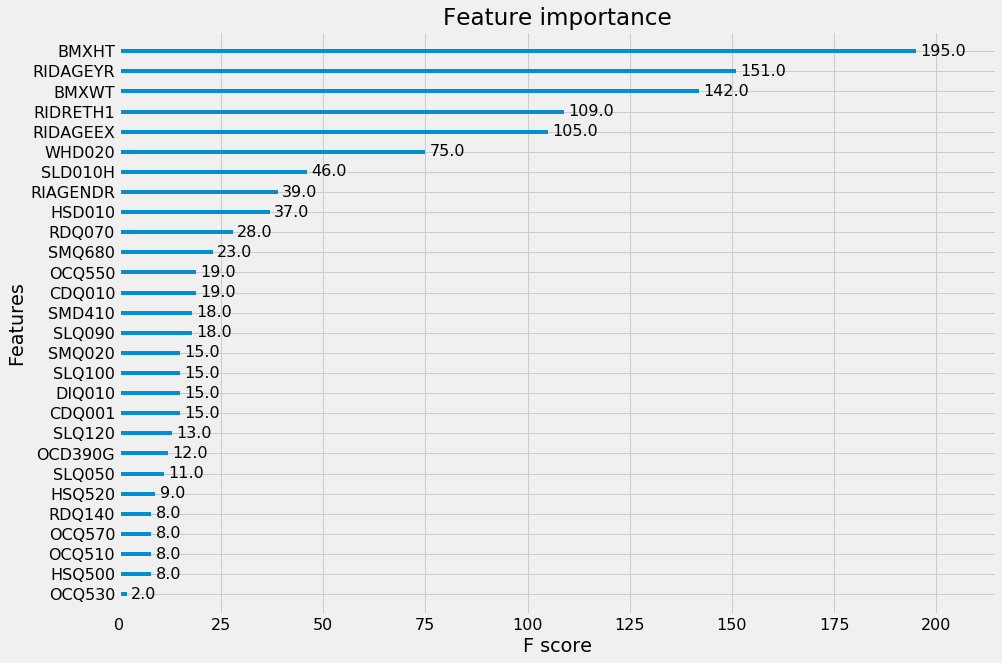

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(14,10))
plot_importance(model, max_num_features=29, ax=ax)
plt.show();